# Linear Discriminant Analysis (LDA)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.decomposition import PCA


from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.inspection import permutation_importance

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# Create X matrix of regressor variables
X = df.drop(['DEATH_EVENT'], axis = 1)

In [6]:
# Create y vector of regressand variable DEATH_EVENT
y = df['DEATH_EVENT']

In [7]:
ratio_death = df[df["DEATH_EVENT"] == 1].DEATH_EVENT.sum() / df.DEATH_EVENT.count()
print(f"Verhältnis positiver vs negativer Ausprägungen in der Zielvariable: {ratio_death}")

Verhältnis positiver vs negativer Ausprägungen in der Zielvariable: 0.3210702341137124


In [8]:
# Hiobs Datengrundlage 

In [9]:
##split
X_train, X_test, y_train, y_test = train_test_split(X.drop(columns="time"), y , test_size=0.20, random_state=3)

##standardize (around 71% acc on val set)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)




### 0. Durchgang: Ursprüngliche Daten

In [10]:
model_0 = LinearDiscriminantAnalysis()

In [11]:
model_0.fit(X_train, y_train)

LinearDiscriminantAnalysis()

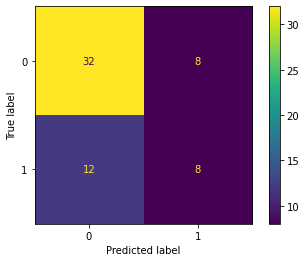

In [12]:
plot_confusion_matrix(model_0, X_test, y_test);

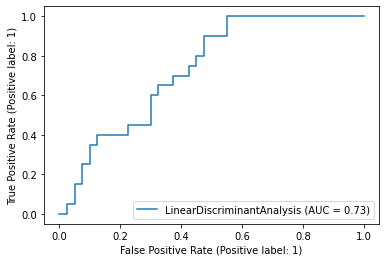

In [13]:
plot_roc_curve(model_0, X_test, y_test);

### 1. Durchgang: Ursprüngliche Daten (standardisiert)

In [14]:
model = LinearDiscriminantAnalysis()

In [15]:
model.fit(X_train_sc, y_train)

LinearDiscriminantAnalysis()

In [16]:
y_pred = model.predict(X_test_sc)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        40
           1       0.50      0.40      0.44        20

    accuracy                           0.67        60
   macro avg       0.61      0.60      0.60        60
weighted avg       0.65      0.67      0.66        60



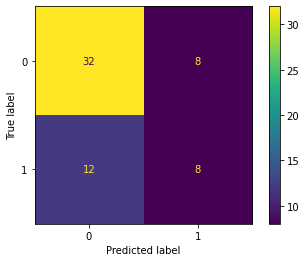

In [18]:
plot_confusion_matrix(model, X_test_sc, y_test);

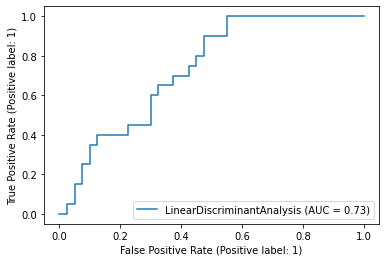

In [19]:
plot_roc_curve(model, X_test_sc, y_test)

### 2. Durchgang: SMOTE Upsampling Daten

In [20]:
#Experiment: SMOTE UPSAMLING

oversample = SMOTE()
X_train_sm, y_train_sm = oversample.fit_resample(X_train_sc, y_train)

print(f"Neues Verhältnis nach SMOTE Anwendung:{y_train_sm[y_train_sm == 1].sum() / len(y_train_sm)}")


Neues Verhältnis nach SMOTE Anwendung:0.5


In [21]:
model_sm = LinearDiscriminantAnalysis()
model_sm.fit(X_train_sm, y_train_sm)

LinearDiscriminantAnalysis()

In [22]:
y_pred = model_sm.predict(X_test_sc)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.57      0.70        40
           1       0.50      0.85      0.63        20

    accuracy                           0.67        60
   macro avg       0.69      0.71      0.66        60
weighted avg       0.76      0.67      0.67        60



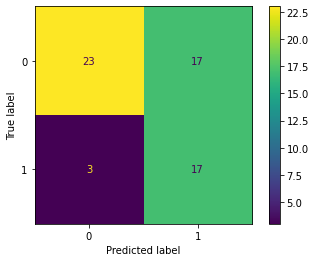

In [24]:
plot_confusion_matrix(model_sm, X_test_sc, y_test);

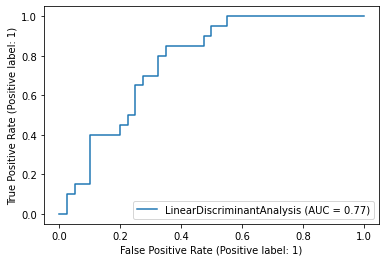

In [25]:
plot_roc_curve(model_sm, X_test_sc, y_test);

### 3. Durchgang: PCA Daten

In [26]:
pca = PCA(n_components=5)
X_train_pca = pd.DataFrame(data = pca.fit_transform(X_train_sc), columns=['pc1','pc2','pc3','pc4','pc5',])
X_test_pca = pd.DataFrame(data = pca.transform(X_test_sc), columns=['pc1','pc2','pc3','pc4','pc5'])

In [27]:
model_pca = LinearDiscriminantAnalysis()
model_pca.fit(X_train_pca, y_train)

LinearDiscriminantAnalysis()

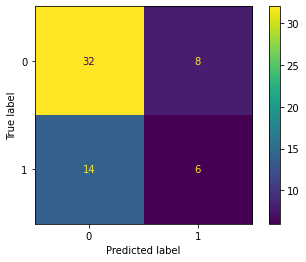

In [28]:
plot_confusion_matrix(model_pca, X_test_pca, y_test);

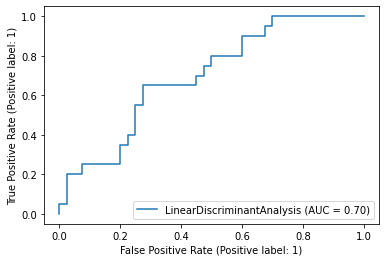

In [29]:
plot_roc_curve(model_pca, X_test_pca, y_test);

### 4. Durchgang: Beste Datengrundlage und Hyperparameter Tuning

In [30]:
grid = {
    'solver': ['lsqr', 'eigen'],
    'shrinkage': list(np.arange(0.01, 1, 0.01))
}


In [31]:
model_tune = LinearDiscriminantAnalysis()
model_tune = GridSearchCV(model_tune, grid, cv=4, scoring = "roc_auc")
model_tune.fit(X_train_sm,y_train_sm)

GridSearchCV(cv=4, estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': [0.01, 0.02, 0.03, 0.04, 0.05,
                                       0.060000000000000005,
                                       0.06999999999999999, 0.08, 0.09,
                                       0.09999999999999999, 0.11, 0.12, 0.13,
                                       0.14, 0.15000000000000002, 0.16, 0.17,
                                       0.18000000000000002, 0.19, 0.2,
                                       0.21000000000000002, 0.22, 0.23,
                                       0.24000000000000002, 0.25, 0.26, 0.27,
                                       0.28, 0.29000000000000004, 0.3, ...],
                         'solver': ['lsqr', 'eigen']},
             scoring='roc_auc')

In [32]:
print(model_tune.best_params_)
print(model_tune.best_estimator_)

{'shrinkage': 0.73, 'solver': 'lsqr'}
LinearDiscriminantAnalysis(shrinkage=0.73, solver='lsqr')


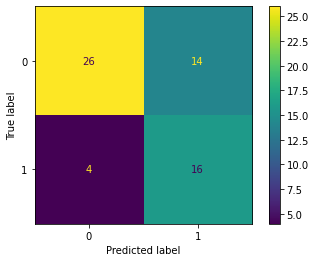

In [33]:
plot_confusion_matrix(model_tune, X_test_sc, y_test);

### Final Evaluation using ROC-AUC Curve & Score

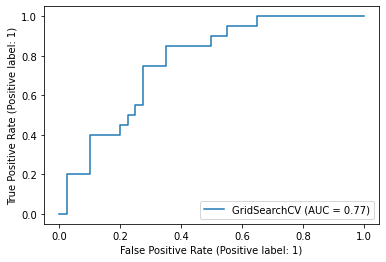

In [34]:
plot_roc_curve(model_tune, X_test_sc, y_test);

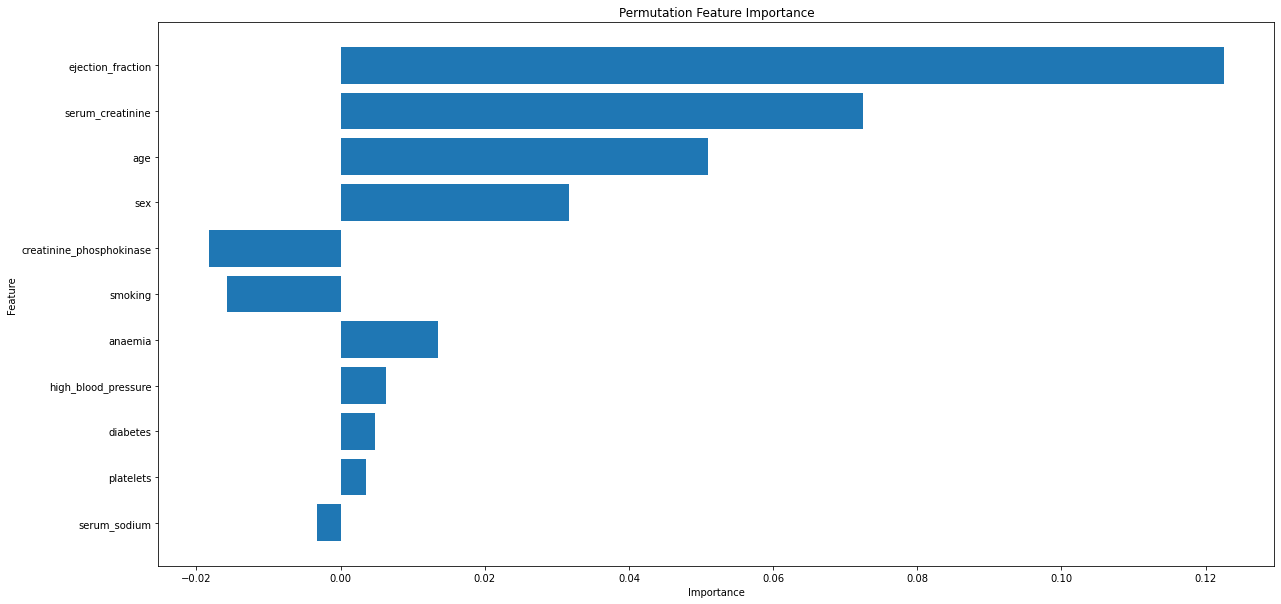

In [38]:
from sklearn.inspection import permutation_importance

plt.figure(figsize=(20,10))
results = permutation_importance(model_sm, X_test_sc, y_test, scoring='roc_auc')
importance = results.importances_mean
importance_pairs = pd.DataFrame(zip(X_test.columns, importance), columns= ["feature", "importance"])
importance_pairs.sort_values(by='importance', ascending=True, ignore_index=True, inplace=True, key=abs)

plt.barh(importance_pairs.iloc[:,0], importance_pairs.iloc[:,1])
plt.xlabel("Importance")
plt.ylabel("Feature")
# plt.rcParams.update({'font.size': 22})
plt.title("Permutation Feature Importance")
plt.show()